<a href="https://colab.research.google.com/github/babuqu/studay/blob/gh-pages/test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#导包
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.6.0


In [ ]:
#导入训练数据
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_lables), (test_images, test_lables)=fashion_mnist.load_data()



# 新段落

In [ ]:
#贴标签
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

数据的形状

In [ ]:
train_images.shape
len(train_lables)
train_lables

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

画图

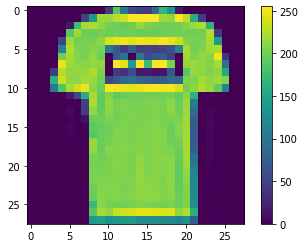

In [ ]:
#调用画图框，里面的数字表示
plt.figure(1)
#打印图片
plt.imshow(train_images[1])
#显示像素值
plt.colorbar()
#画网格，True表示画，False表示不画
plt.grid(False)
plt.show()

In [ ]:
#数据归一化,网络中值的范围为0~1，一个通道的颜色最大值是255
train_images = train_images / 255.0
test_images= test_images / 255.0

画图

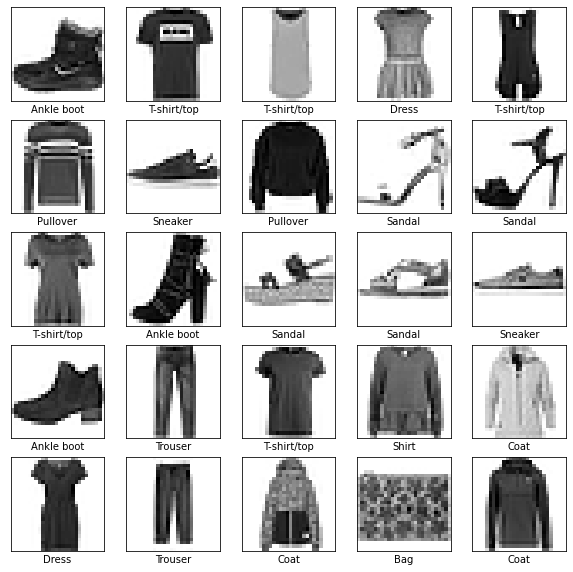

In [ ]:
plt.figure(figsize=(10,10))#figsize指定图片大小为10*10
for i in range(25):
  plt.subplot(5,5,i+1)#小窗口
  plt.xticks([])#plt.xticks() 表达的是x轴的刻度内容的范围
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)#cmap选颜色,binary为灰度图
  plt.xlabel(class_names[train_lables[i]])
  plt.show

接下来搭建一个神经网络

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),#输入图片踏平为一维，作为网络的输入
    tf.keras.layers.Dense(128, activation='relu'),#节点个数为128，激活规则为relu
    tf.keras.layers.Dense(10)#输出节点个数为10
])

配置网络参数

In [ ]:
model.compile(optimizer='adam',#损失函数
      #优化器
       loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits='true'),
       #指标
       metrics=['accuracy']       
       )

In [ ]:
#调用model.fit 方法训练数据,epochs  10次
model.fit(train_images, train_lables, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4203 - accuracy: 0.8527
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4139 - accuracy: 0.8542
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4082 - accuracy: 0.8562
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4033 - accuracy: 0.8578
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3981 - accuracy: 0.8603
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3939 - accuracy: 0.8608
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3898 - accuracy: 0.8613
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3865 - accuracy: 0.8633
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3826 - accuracy: 0.8647
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.379

In [ ]:
#模型评估
test_loss, test_acc = model.evaluate(test_images, test_lables, verbose=2)
print('\n测试精度:',test_acc)
print('\n测试损失：',test_loss)

313/313 - 0s - loss: 0.4182 - accuracy: 0.8490

测试精度: 0.8489999771118164

测试损失： 0.41824784874916077


预测

In [ ]:
#加一个输出层
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])


In [ ]:
predictions = probability_model.predict(test_images)

In [ ]:
#测试集输出形状
predictions.shape
predictions[0]

array([1.9391503e-07, 1.3272594e-08, 2.0452339e-06, 1.4248341e-06,
       5.6029280e-06, 1.4752281e-01, 4.7056333e-06, 1.4112045e-01,
       4.4006421e-03, 7.0694214e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])#返回最大值的位置,此处是返回预测的第一个标签值

9

In [ ]:
test_lables[0]#实际的第一个标签值

9

In [ ]:
#画图子函数
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:#如果预测等于真实
    color = 'blue'
  else:
    color = 'red'
  #x轴标签
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))#刻度
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

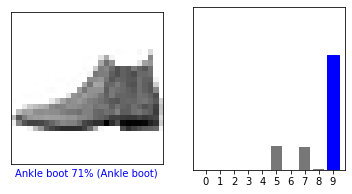

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_lables, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_lables)
plt.show()

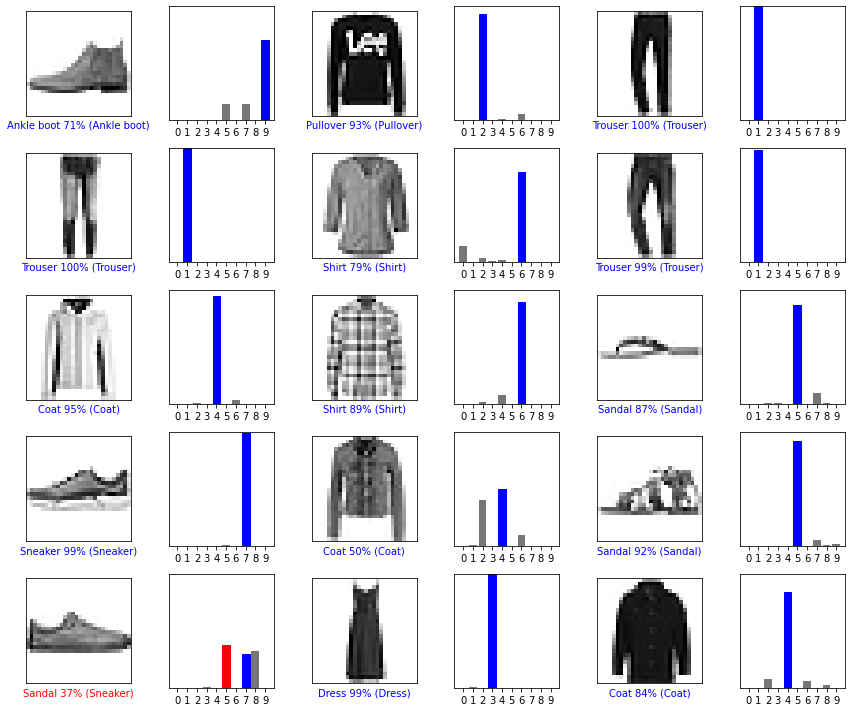

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  #画图片
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_lables, test_images)
  #画矩形图
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_lables)
  
#tight_layout会自动调整子图参数，使之填充整个图像区域
plt.tight_layout()
plt.show()

In [ ]:
#使用训练好的模型
img = test_images[1]
print(img.shape)

(28, 28)


In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))#单个图片加到批处理中

print(img.shape)

(1, 28, 28)


In [ ]:
predict_single = probability_model.predict(img)#单个图片预测结果
print(predict_single)

[[2.9868525e-04 1.7415757e-06 9.3350184e-01 3.7157850e-05 1.2179752e-02
  9.0763490e-12 5.3892102e-02 3.6742099e-17 8.8638946e-05 3.6283358e-14]]


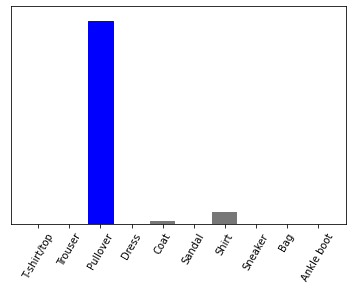

In [ ]:
plot_value_array(1, predict_single[0], test_lables)
_ = plt.xticks(range(10), class_names, rotation=60)#旋转60度
plt.show()

In [ ]:
np.argmax(predict_single[0])

2